# $\chi$ parameters

$\chi$ parameters introduced by [Ackland and Jones](http://pyscal.com/en/latest/methods/angularmethods/chiparams.html) measures the angles generated by pairs of neighbor atom around the host atom, and assigns it to a histogram to calculate a local structure. In this example, we will create different crystal structures and see how the $\chi$ parameters change with respect to the local coordination.

In [2]:
from pyscal3 import System
import matplotlib.pyplot as plt
import numpy as np

We create four different structures

In [3]:
fcc = System.create.lattice.fcc(lattice_constant=4, repetitions=[4,4,4])
bcc = System.create.lattice.bcc(lattice_constant=4, repetitions=[4,4,4])
hcp = System.create.lattice.hcp(lattice_constant=4, repetitions=[4,4,4])
dia = System.create.lattice.diamond(lattice_constant=4, repetitions=[4,4,4])

Before calculating $\chi$ parameters, the [neighbors for each atom](http://pyscal.com/en/latest/methods/nearestneighbormethods/nearestneighbormethods.html) need to be found.

In [4]:
fcc.find.neighbors(method='cutoff', cutoff='adaptive')
bcc.find.neighbors(method='cutoff', cutoff='adaptive')
hcp.find.neighbors(method='cutoff', cutoff='adaptive')
dia.find.neighbors(method='cutoff', cutoff='adaptive')

/home/menon/miniconda3/envs/pyscal-test/lib/python3.10/site-packages/pyscal3/atoms.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dict.__setitem__(self, key, np.array(val))


Now, $\chi$ parameters can be calculated

In [5]:
fcc.calculate.chi_params()
bcc.calculate.chi_params()
hcp.calculate.chi_params()
dia.calculate.chi_params()

The calculated parameters can be accessed

In [6]:
fcc.atoms.angular_parameters.chi_params

array([[ 6,  0,  0, ...,  0, 24,  0],
       [ 6,  0,  0, ...,  0, 24,  0],
       [ 6,  0,  0, ...,  0, 24,  0],
       ...,
       [ 6,  0,  0, ...,  0, 24,  0],
       [ 6,  0,  0, ...,  0, 24,  0],
       [ 6,  0,  0, ...,  0, 24,  0]])

The output is an array of length 9 which shows the number of neighbor angles found within specific bins as explained [here](http://pyscal.com/en/latest/methods/angularmethods/chiparams.html). The output for one atom from each structure is shown below.

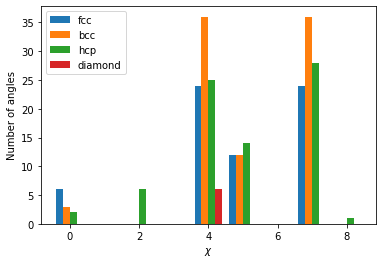

In [8]:
plt.bar(np.array(range(9))-0.3, fcc.atoms.angular_parameters.chi_params[10], width=0.2, label="fcc")
plt.bar(np.array(range(9))-0.1, bcc.atoms.angular_parameters.chi_params[10], width=0.2, label="bcc")
plt.bar(np.array(range(9))+0.1, hcp.atoms.angular_parameters.chi_params[10], width=0.2, label="hcp")
plt.bar(np.array(range(9))+0.3, dia.atoms.angular_parameters.chi_params[10], width=0.2, label="diamond")
plt.xlabel("$\chi$")
plt.ylabel("Number of angles")
plt.legend()

The atoms exhibit a distinct fingerprint for each structure. Structural identification can be made up comparing the ratio of various $\chi$ parameters as described in the [original publication](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.73.054104).